In [35]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss

### We want to create 100,000 fBm fields of 100x100 pixels

$H$ ranges from 0 to 1,  $\sigma$ ranges from 0.1 to 3

In [36]:
H_min = 0.0
H_max = 1.0

sigma_min = 0.1
sigma_max = 3.0

First we need to generate our 100,000 input parameters.

i.e. 100,000 different values of $H$, and 100,000 different values of $\sigma$

(array([ 10217.,  10002.,   9991.,   9921.,  10030.,   9990.,   9994.,
          9872.,   9942.,  10041.]),
 array([ 0.10001156,  0.39000739,  0.68000323,  0.96999906,  1.2599949 ,
         1.54999073,  1.83998657,  2.1299824 ,  2.41997824,  2.70997407,
         2.99996991]),
 <a list of 10 Patch objects>)

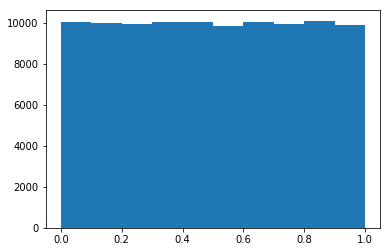

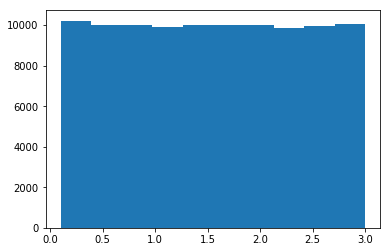

In [37]:
N = 100000

H_list = np.random.random(N)
sigma_list = (sigma_max-sigma_min)*np.random.random(N)+sigma_min

plt.figure()
plt.hist(H_list,bins = 10)

plt.figure()
plt.hist(sigma_list, bins=10)

In [38]:
target_list = np.zeros((N,2))
target_list[:,0] = H_list
target_list[:,1] = sigma_list
print(np.shape(target_list))

(100000, 2)


(array([ 10217.,  10002.,   9991.,   9921.,  10030.,   9990.,   9994.,
          9872.,   9942.,  10041.]),
 array([ 0.10001156,  0.39000739,  0.68000323,  0.96999906,  1.2599949 ,
         1.54999073,  1.83998657,  2.1299824 ,  2.41997824,  2.70997407,
         2.99996991]),
 <a list of 10 Patch objects>)

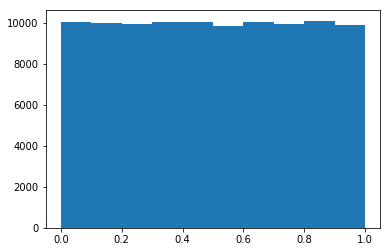

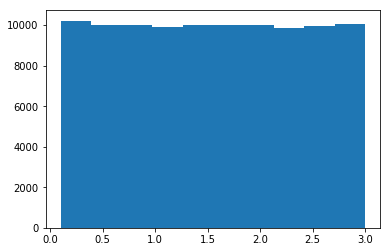

In [39]:
plt.figure()
plt.hist(target_list[:,0],bins = 10)

plt.figure()
plt.hist(target_list[:,1], bins=10)

In [40]:
split_list = np.split(target_list,10)
print(len(split_list))

10


##### We want 2-dimensional 100x100 pixel fields

In [41]:
N_p = 100
E = 2

##### Now we generate our 10,000 fields and save to disk.

In [42]:
c=0
for i in range(N):
    if i%(N/len(split_list)) == 0:
        path = '../Data/fBmFieldANN/fields/training/batch_0'+str(c)+'/'
        c+=1
        print(c-1)
        np.savetxt(path+'target.txt',split_list[c-1])
    field = ss.fBm(N_p,E,target_list[i,0],target_list[i,1])
    field/=np.amax(field)
    np.savetxt(path+str(E)+'D_fBm_'+str(N_p)+'_'+format(i,'06d')+'.txt',field)

0


C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


1
2
3
4
5
6
7
8
9
